In [3]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import zscore

In [6]:
#create a sample dataset 
np.random.seed(42)
#Noraml dataw with mean=50 .std=10
data=np.random.normal(loc=50,scale=10,size=100)  
#outliers
outliers =np.array([10,110,5,120])
#Adding  outliers to the dataset
data=np.concatenate([data,outliers])


In [11]:
df =pd.DataFrame(data,columns=["Values"])
print(df)

         Values
0     54.967142
1     48.617357
2     56.476885
3     65.230299
4     47.658466
..          ...
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000

[104 rows x 1 columns]


In [16]:
***Using Scatter plot***
**<ins> A Scatter plot helps visually identify extreme values.<ins>**

SyntaxError: invalid syntax (129408335.py, line 1)

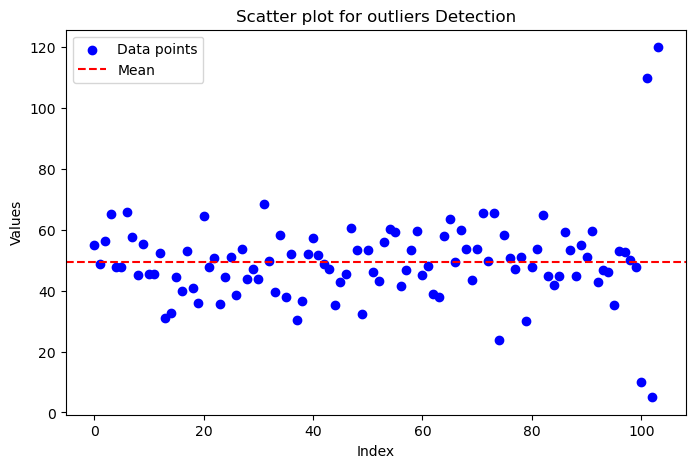

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  
plt.scatter(range(len(df)), df['Values'], color='blue', label='Data points')
plt.axhline(y=df['Values'].mean(), color='red', linestyle="--", label="Mean")
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outliers Detection")
plt.legend()
plt.show()


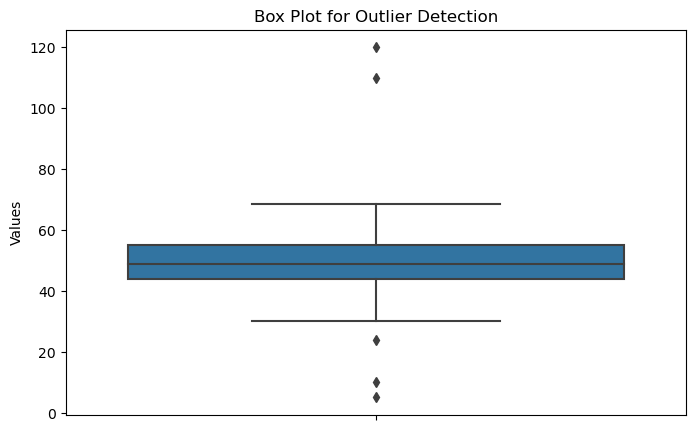

In [17]:
#identify outliers 
# easy to identify the  outliers 
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y="Values")
plt.title("Box Plot for Outlier Detection")
plt.show()

In [21]:
#Z-score 
df['Z-score']=zscore(df['Values'])
df['Outliers_Z']=df['Z-score'].apply(lambda x:'Outliers' if abs(x) > 3 else 'Normal')
df[df['Outliers_Z']=='Outliers']

,Values,Z-score,Outliers_Z
101,110.0,4.328173,Outliers
102,5.0,-3.175368,Outliers
103,120.0,5.042796,Outliers


In [27]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)

IQR = Q3- Q1

lower_bound =Q1-1.5 * IQR
upper_bound =Q3 + 1.5 * IQR 

#outliers =df[(df['Values'] < lower_bound) | (df['Values'] > upper_bound)]
#outliers

df['Outlieres_IQR'] = df['Values'].apply(lambda x: "outlier" if (x < lower_bound or x > upper_bound) else "Normal")
print(df[df["Outlieres_IQR"] == "outlier"])


         Values   Z-score Outliers_Z Outlieres_IQR
74    23.802549 -1.831694     Normal       outlier
100   10.000000 -2.818056     Normal       outlier
101  110.000000  4.328173   Outliers       outlier
102    5.000000 -3.175368   Outliers       outlier
103  120.000000  5.042796   Outliers       outlier


In [30]:
import pandas as pd
import numpy as np

# Random seed for reproducibility
np.random.seed(42)

# Generate ratings (including extreme ones like 11 and -5)
ratings = np.random.randint(1, 11, 100)
ratings[::10] = np.random.choice([11, -5], size=10)  # Add extreme outliers every 10th row

# Simulate fun review sentiments
sentiments = np.random.choice(['Positive', 'Neutral', 'Negative'], size=100)

# Add funny or contradictory reviews
reviews = []
for i in range(100):
    if ratings[i] == 11:
        reviews.append("Absolutely hated this movie, but 10/10 for some reason!")
    elif ratings[i] == -5:
        reviews.append("Loved it, but would never recommend!")
    else:
        reviews.append(f"Review {i+1}: This movie was amazing!" if ratings[i] > 7 else "Review {i+1}: Worst movie ever!")

# Create the DataFrame
movie_data = pd.DataFrame({
    'Review': reviews,
    'Rating': ratings,
    'Sentiment': sentiments
})

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = movie_data['Rating'].quantile(0.25)
Q3 = movie_data['Rating'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR
outliers = movie_data[(movie_data['Rating'] < lower_bound) | (movie_data['Rating'] > upper_bound)]

# Now manually add outliers with extreme ratings (11 and -5)
extreme_outliers = movie_data[(movie_data['Rating'] == 11) | (movie_data['Rating'] == -5)]

# Combine IQR outliers and extreme outliers
final_outliers = pd.concat([outliers, extreme_outliers]).drop_duplicates()

# Display the outliers
print("Outliers in the dataset:")
print(final_outliers)


Outliers in the dataset:
                                               Review  Rating Sentiment
0                Loved it, but would never recommend!      -5   Neutral
10               Loved it, but would never recommend!      -5  Positive
20  Absolutely hated this movie, but 10/10 for som...      11   Neutral
30               Loved it, but would never recommend!      -5  Negative
50  Absolutely hated this movie, but 10/10 for som...      11  Negative
80  Absolutely hated this movie, but 10/10 for som...      11  Positive


In [ ]:
#Final Summary 
#1] Scatter Plot -> Outliers apper far from the main cluster 
#2]Box Plot -> Outliers are outside the whiskers
#3]Z-score ->Values with Z >3 or Z <-3 are outliers  
#4]IQR     ->Values outside[Q1-1.5 *IQR, Q3 +1.5*IQR


#==============================================================================
 
# Finding outlier Using the IO+QR Methods woitih a 5_number Summary 

#Minimum (Q0) → The smallest value in the dataset.
 
#First Quartile (Q1) → The 25th percentile (lower quartile).
 
#Median (Q2) → The 50th percentile (middle value).
 
#Third Quartile (Q3) → The 75th percentile (upper quartile).
 
#Maximum (Q4) → The largest value in the dataset.

#The Interquartile Range (IQR) is calculated as:
 
#IQR=Q3−Q1
 
#Any value outside the range:
 
#[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.


In [ ]:
np.random.seed(42) 
data= np.random.noraml(loc=50,scale=10, size =100) 
outlier =np.array([10,110,5,120])
data=np.concatenc


In [31]:
# Step 1: Create a dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution (mean=50, std=10)
outliers = np.array([10, 110, 5, 120])  # Extreme values (outliers)
data = np.concatenate([data, outliers])  # Merge normal data with outliers

# Step 2: Compute the 5-number summary
Q1 = np.percentile(data, 25)  # First Quartile (25th percentile)
Q2 = np.median(data)          # Median (50th percentile)
Q3 = np.percentile(data, 75)  # Third Quartile (75th percentile)
min_value = np.min(data)      # Minimum
max_value = np.max(data)      # Maximum

# Step 3: Compute IQR
IQR = Q3 - Q1

# Step 4: Compute Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Find Outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Step 6: Print Results
print(f"5-Number Summary:\nMin: {min_value}, Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")

5-Number Summary:
Min: 5.0, Q1: 43.874401021766715, Median (Q2): 48.73043708220287, Q3: 55.00852473036764, Max: 120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]


In [32]:
import pandas as pd
from sklearn.utils import resample

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['High', 'Low', 'High', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low']
})

# Separate majority and minority classes
df_high = df[df['Class'] == 'High']
df_low = df[df['Class'] == 'Low']

# Downsample majority class
df_high_downsampled = resample(df_high, replace=False, n_samples=len(df_low), random_state=42)

# Combine downsampled majority class with minority class
df_balanced = pd.concat([df_high_downsampled, df_low])

print(df_balanced['Class'].value_counts())

Class
High    6
Low     6
Name: count, dtype: int64


In [33]:
print(df_high)

    Age  Income Class
0    22    2000  High
2    27    2700  High
4    30    3500  High
5    35    3800  High
6    40    4000  High
8    50    4300  High
10   60    5000  High


In [34]:
print(df_low)

    Age  Income Class
1    25    2500   Low
3    28    3200   Low
7    45    4200   Low
9    55    4500   Low
11   65    5500   Low
12   70    6000   Low


In [35]:
df_high_downsampled

,Age,Income,Class
0,22,2000,High
2,27,2700,High
8,50,4300,High
4,30,3500,High
6,40,4000,High
5,35,3800,High


In [36]:
df_balanced

,Age,Income,Class
0,22,2000,High
2,27,2700,High
8,50,4300,High
4,30,3500,High
6,40,4000,High
5,35,3800,High
1,25,2500,Low
3,28,3200,Low
7,45,4200,Low
9,55,4500,Low


In [39]:
import pandas as pd
from sklearn.utils import resample

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['High', 'Low', 'High', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low']
})

# Separate majority and minority classes
df_high = df[df['Class'] == 'High']
df_low = df[df['Class'] == 'Low']

# upsamples minoraty class
df_low_upsampled = resample(df_low, replace=True, n_samples=len(df_high), random_state=42)

# Combine downsampled majority class with minority class
df_balanced = pd.concat([df_low_upsampled, df_high])

print(df_balanced['Class'].value_counts())

Class
Low     7
High    7
Name: count, dtype: int64


In [40]:
import pandas as pd
from sklearn.utils import resample

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['Minority', 'Majority', 'Majority', 'Majority', 'Majority', 'Minority',
              'Minority', 'Minority', 'Majority', 'Majority', 'Majority', 'Majority', 'Majority']
})

df[df['Class'] == 'Majority']

# Separate majority and minority classes
df_majority = df[df['Class'] == 'Majority']
df_minority = df[df['Class'] == 'Minority']

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine upsampled minority class with majority class
df_balanced_up = pd.concat([df_majority, df_minority_upsampled])

# Display new class distribution
print(df_balanced_up['Class'].value_counts())

Class
Majority    9
Minority    9
Name: count, dtype: int64


In [41]:
df_minority

,Age,Income,Class
0,22,2000,Minority
5,35,3800,Minority
6,40,4000,Minority
7,45,4200,Minority


In [42]:
df_majority

,Age,Income,Class
1,25,2500,Majority
2,27,2700,Majority
3,28,3200,Majority
4,30,3500,Majority
8,50,4300,Majority
9,55,4500,Majority
10,60,5000,Majority
11,65,5500,Majority
12,70,6000,Majority


In [43]:
df_minority_upsampled

,Age,Income,Class
6,40,4000,Minority
7,45,4200,Minority
0,22,2000,Minority
6,40,4000,Minority
6,40,4000,Minority
7,45,4200,Minority
0,22,2000,Minority
0,22,2000,Minority
6,40,4000,Minority


In [44]:
df_balanced_up


,Age,Income,Class
1,25,2500,Majority
2,27,2700,Majority
3,28,3200,Majority
4,30,3500,Majority
8,50,4300,Majority
9,55,4500,Majority
10,60,5000,Majority
11,65,5500,Majority
12,70,6000,Majority
6,40,4000,Minority


In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['Minority', 'Majority', 'Majority', 'Majority', 'Majority',
              'Minority', 'Minority', 'Minority', 'Majority', 'Majority',
              'Majority', 'Majority', 'Majority']
})

# Step 1: Convert categorical labels to numerical values
df['Class'] = df['Class'].map({'Majority': 0, 'Minority': 1})

# Step 2: Split features (X) and target variable (y)
X = df[['Age', 'Income']]
y = df['Class']

# Step 3: Apply SMOTE with k_neighbors=3 (reducing from default 5)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Convert numeric labels back to categorical
y_resampled = y_resampled.map({0: 'Majority', 1: 'Minority'})

# Step 5: Combine the resampled dataset
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=['Age', 'Income']),
                         pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# Step 6: Print class distribution
print(df_balanced['Class'].value_counts())

# Step 7: Display the upsampled dataset
print(df_balanced)


Class
Minority    9
Majority    9
Name: count, dtype: int64
    Age  Income     Class
0    22    2000  Minority
1    25    2500  Majority
2    27    2700  Majority
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Minority
6    40    4000  Minority
7    45    4200  Minority
8    50    4300  Majority
9    55    4500  Majority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Majority
13   40    4031  Minority
14   35    3831  Minority
15   44    4176  Minority
16   35    3826  Minority
17   41    4040  Minority


In [47]:
import sklearn
print(sklearn.__version__)


1.3.0


In [1]:
pip install --user --upgrade scikit-learn imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   -------------------- ------------------- 122.9/238.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
